# Multiple Parameter Estimations
It is often desirable to run a single optimization problem many times. In copasi this is fairly easy using the `repeat` scan item. In Pycotools we can use the `MultipleParameterEstimation` class to the same end.   

## Pre-requisites
### Get the Demonstration model
-  Zi et al 2012

In [1]:
%matplotlib inline
import site
site.addsitedir('//home/b3053674/Documents/pycotools')
from pycotools import model, tasks, viz, misc
from pycotools.Tests import test_models
import os
import pandas
from lxml import etree


import logging
logging.basicConfig(format = '%(levelname)s:%(message)s')
LOG=logging.getLogger()

## get string model from test_models
zi_model_string = test_models.TestModels().zi_model()

## get a working directory. Change this to change this to wherever you like
directory = r'/home/b3053674/Documents/pycotools/ZiModel'

## choose path to zi model
zi_path = os.path.join(directory, 'zi2012.cps')

##write model to file
with open(zi_path, 'w') as f:
    f.write(zi_model_string)
    
## check file exists
if not os.path.isfile(zi_path):
    raise Exception

zi = model.Model(zi_path)

root:INFO:27:    Initializing pycotools
root:INFO:28:    Initializing logging System
root:INFO:29:    logging config file at: //home/b3053674/Documents/pycotools/pycotools/logging_config.conf


### Generate Synthetic Data

In [2]:
report= 'parameter_estimation_synthetic_data.txt'
TC=tasks.TimeCourse(
    zi, start=0, end=1000, intervals=100, step_size=10, report_name=report
)

## validate that its worked
pandas.read_csv(TC.report_name,sep='\t').head()

## informative name
zi_data_file = TC.report_name

### Format synthetic data 

In [3]:
misc.correct_copasi_timecourse_headers(zi_data_file)

,Time,Smad3n,Smad3c,Smad4n,Smad4c,T1R_Surf,T2R_Cave,T2R_Surf,Smads_Complex_n,T1R_EE,...,Kcd,kr_Cave,ki_Cave,Kexp_Smad4n,Kdiss_Smads_Complex_n,Kimp_Smad2c,Kimp_Smads_Complex_c,Kimp_Smad4c,Kdeg_T2R_EE,k_Smads_Complex_c
0,0,236.450,492.610,551.720,1149.400,0.237000,1.778000,0.202000,0.0000,2.060000,...,0.005,0.03742,0.33,0.5,0.1174,0.16,0.16,0.08,0.025,0.000069
1,10,213.879,419.285,537.499,1073.290,0.046698,1.261880,0.013032,79.8621,1.543130,...,0.005,0.03742,0.33,0.5,0.1174,0.16,0.16,0.08,0.025,0.000069
2,20,190.086,331.218,529.637,979.915,0.041292,0.903526,0.012959,252.7810,1.175980,...,0.005,0.03742,0.33,0.5,0.1174,0.16,0.16,0.08,0.025,0.000069
3,30,181.994,291.099,532.446,936.161,0.034809,0.658106,0.013734,356.7320,0.908233,...,0.005,0.03742,0.33,0.5,0.1174,0.16,0.16,0.08,0.025,0.000069
4,40,179.937,277.648,534.984,921.179,0.028182,0.492606,0.015320,396.7650,0.706949,...,0.005,0.03742,0.33,0.5,0.1174,0.16,0.16,0.08,0.025,0.000069
5,50,179.712,274.549,536.189,917.603,0.022043,0.384409,0.017793,408.4850,0.551699,...,0.005,0.03742,0.33,0.5,0.1174,0.16,0.16,0.08,0.025,0.000069
6,60,180.350,276.037,536.916,919.062,0.016803,0.318202,0.021237,408.4150,0.429919,...,0.005,0.03742,0.33,0.5,0.1174,0.16,0.16,0.08,0.025,0.000069
7,70,181.553,280.139,537.544,923.355,0.012651,0.283565,0.025638,402.2910,0.333825,...,0.005,0.03742,0.33,0.5,0.1174,0.16,0.16,0.08,0.025,0.000069
8,80,183.149,285.947,538.168,929.488,0.009548,0.273063,0.030828,392.4150,0.258271,...,0.005,0.03742,0.33,0.5,0.1174,0.16,0.16,0.08,0.025,0.000069
9,90,185.019,292.922,538.800,936.875,0.007309,0.280948,0.036535,380.0150,0.199395,...,0.005,0.03742,0.33,0.5,0.1174,0.16,0.16,0.08,0.025,0.000069


# The MultipleParameterEstimation Class
The MultipleParameterEstimation class is an interface to the ParameterEstimation class and accepts all of the same keyword parameters with a few extra:

    1. `copy_number`          --> Number of times to copy a copasi file. All of these will be run simultaneously. 
    2. `pe_number`            --> How many parameter estimations to conduct **per model**
    3. `results_directory`    --> Name of the directory to put the results (created if not exists)

The total number of estimations that can be carried out simultaneously is $copy\_number\cdot pe\_number$. 

In [4]:
MPE=tasks.MultiParameterEstimation(
    zi, zi_data_file, copy_number=4, pe_number=2, #--> 8 total
    metabolites=[], local_parameters=[], lower_bound=1e-3, upper_bound=5e3, 
    method='genetic_algorithm', population_size=50, number_of_generations=200)
    
MPE.write_config_file()
MPE.setup()
# MPE.run()

{0: Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol),
 1: Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol),
 2: Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol),
 3: Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol)}

All models are executed using CopasiSE at the same time. For this reason, if you have too many models running at once on a single machine, the machine will slow and be unusable until the estimations have finished. My Windows machine (i7, 16GB RAM) can comfortably run around 6 or 7 models at once before things start to slow. My Ubuntu machine can run more but the estimations are significantly slower. If using a SunGridEngine based job scheduler you can use `run = SGE` to submit the jobs automatically. If your using a different job scheduler it is straight forward to write another function within the `pycopi.Run` class to support your scheduler. Feel free to contact me for advice.   

## Custom Results Directory

In [5]:
results_directory = 'Fit1Results' #defaults to same directory as model
MPE = tasks.MultiParameterEstimation(
    zi, zi_data_file, copy_number=4, pe_number=2,
    results_directory=results_directory)
MPE.write_config_file()
MPE.setup()
# MPE.run()

{0: Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol),
 1: Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol),
 2: Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol),
 3: Model(name=Zi2007_TGFbeta_signaling, time_unit=min, volume_unit=l, quantity_unit=nmol)}

# Visualization
Exploring parameter estimation data is one of pycotools strengths. 

## Time course ensembles

pycotools.viz:INFO:1548:    inserting parameter set 0
pycotools.viz:INFO:1550:                                      0
Kcd                    1.000000e-01
Kdeg_T1R_EE            1.050810e-01
Kdeg_T2R_EE            1.000000e-01
Kdiss_Smads_Complex_n  1.207290e-01
Kexp_Smad2n            9.901300e-01
Kexp_Smad4n            4.327700e-01
Kimp_Smad2c            1.577580e-01
Kimp_Smad4c            1.093600e-01
Kimp_Smads_Complex_c   1.523440e-01
Klid                   1.000000e-01
RSS                    4.441380e+08
Total_Smad2c           3.064300e+01
Total_Smad2n           2.159830e+00
k_LRC                  1.000000e+02
k_Smads_Complex_c      1.005960e-01
ki_Cave                3.379310e-01
ki_EE                  3.153020e-01
kr_Cave                1.042640e-01
kr_EE                  1.016610e-01
v_T1R                  1.000000e-01
v_T2R                  1.000000e-01
pycotools.viz:INFO:1548:    inserting parameter set 1
pycotools.viz:INFO:1550:                                      1
Kcd     

pycotools.viz:DEBUG:1589:    parameter --> Smad3n
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90  1

pycotools.viz:DEBUG:1589:    parameter --> Smad3c
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90  1

pycotools.viz:DEBUG:1589:    parameter --> Smad4n
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90  1

pycotools.viz:DEBUG:1589:    parameter --> Smad4c
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90  1

pycotools.viz:DEBUG:1589:    parameter --> T1R_Surf
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90 

pycotools.viz:DEBUG:1589:    parameter --> T2R_Cave
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90 

pycotools.viz:DEBUG:1589:    parameter --> T2R_Surf
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90 

pycotools.viz:DEBUG:1589:    parameter --> Smads_Complex_n
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9  

pycotools.viz:DEBUG:1589:    parameter --> T1R_EE
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90  1

pycotools.viz:DEBUG:1589:    parameter --> T1R_Cave
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90 

pycotools.viz:DEBUG:1589:    parameter --> TGF_beta
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90 

pycotools.viz:DEBUG:1589:    parameter --> LRC_Cave
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90 

pycotools.viz:DEBUG:1589:    parameter --> LRC_Surf
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90 

pycotools.viz:DEBUG:1589:    parameter --> Smads_Complex_c
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9  

pycotools.viz:DEBUG:1589:    parameter --> T2R_EE
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90  1

pycotools.viz:DEBUG:1589:    parameter --> LRC_EE
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90  1

pycotools.viz:DEBUG:1589:    parameter --> Kexp_Smad2n
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      

pycotools.viz:DEBUG:1589:    parameter --> Kdeg_T1R_EE
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      

pycotools.viz:DEBUG:1589:    parameter --> Klid
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90  185

pycotools.viz:DEBUG:1589:    parameter --> Total_Smad2c


/home/b3053674/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90  185.019  292.922  538.800   936.875  0.007309  0.28

pycotools.viz:DEBUG:1589:    parameter --> Total_Smad2n
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9     

pycotools.viz:DEBUG:1589:    parameter --> kr_EE
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90  18

pycotools.viz:DEBUG:1589:    parameter --> ki_EE
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90  18

pycotools.viz:DEBUG:1589:    parameter --> v_T2R
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90  18

pycotools.viz:DEBUG:1589:    parameter --> v_T1R
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90  18

pycotools.viz:DEBUG:1589:    parameter --> k_LRC
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90  18

pycotools.viz:DEBUG:1589:    parameter --> Kcd
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90  185.

pycotools.viz:DEBUG:1589:    parameter --> kr_Cave
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90  

pycotools.viz:DEBUG:1589:    parameter --> ki_Cave
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      90  

pycotools.viz:DEBUG:1589:    parameter --> Kexp_Smad4n
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      

pycotools.viz:DEBUG:1589:    parameter --> Kdiss_Smads_Complex_n
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828 

pycotools.viz:DEBUG:1589:    parameter --> Kimp_Smad2c
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      

pycotools.viz:DEBUG:1589:    parameter --> Kimp_Smads_Complex_c
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828  

pycotools.viz:DEBUG:1589:    parameter --> Kimp_Smad4c
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      

pycotools.viz:DEBUG:1589:    parameter --> Kdeg_T2R_EE
pycotools.viz:DEBUG:1588:    experiemntal data --> {'/home/b3053674/Documents/pycotools/ZiModel/parameter_estimation_synthetic_data.txt':      Time   Smad3n   Smad3c   Smad4n    Smad4c  T1R_Surf  T2R_Cave  T2R_Surf  \
0       0  236.450  492.610  551.720  1149.400  0.237000  1.778000  0.202000   
1      10  213.879  419.285  537.499  1073.290  0.046698  1.261880  0.013032   
2      20  190.086  331.218  529.637   979.915  0.041292  0.903526  0.012959   
3      30  181.994  291.099  532.446   936.161  0.034809  0.658106  0.013734   
4      40  179.937  277.648  534.984   921.179  0.028182  0.492606  0.015320   
5      50  179.712  274.549  536.189   917.603  0.022043  0.384409  0.017793   
6      60  180.350  276.037  536.916   919.062  0.016803  0.318202  0.021237   
7      70  181.553  280.139  537.544   923.355  0.012651  0.283565  0.025638   
8      80  183.149  285.947  538.168   929.488  0.009548  0.273063  0.030828   
9      

pycotools.viz:DEBUG:1589:    parameter --> k_Smads_Complex_c


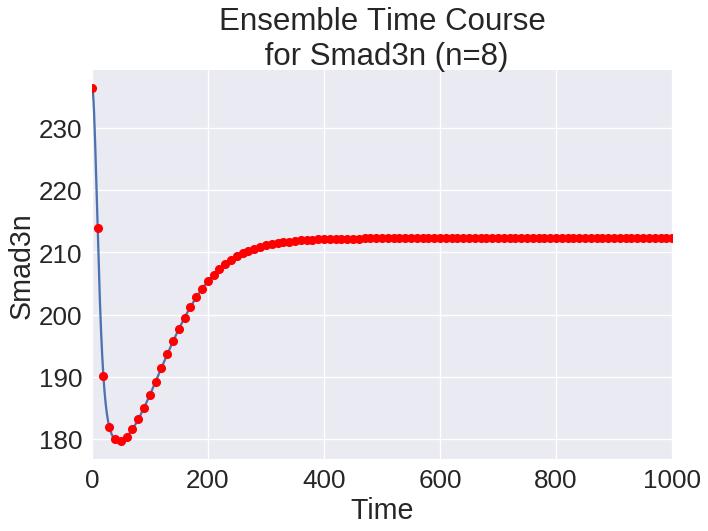

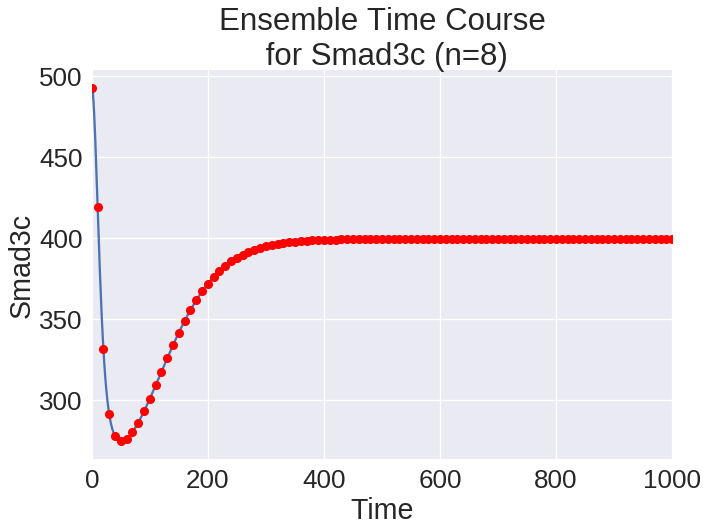

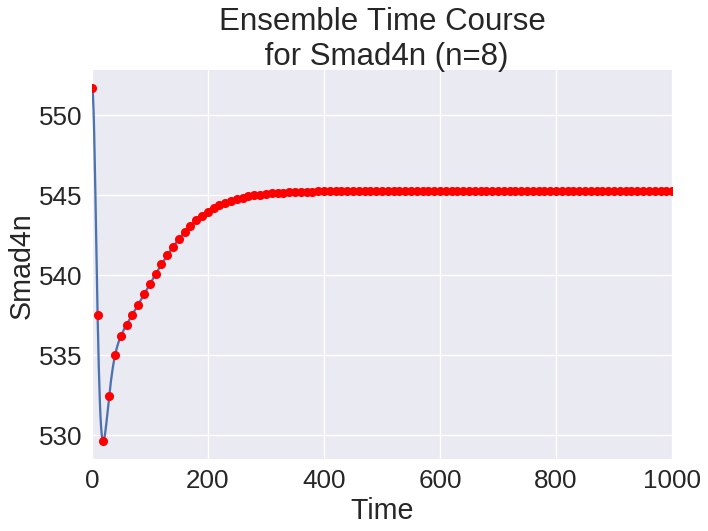

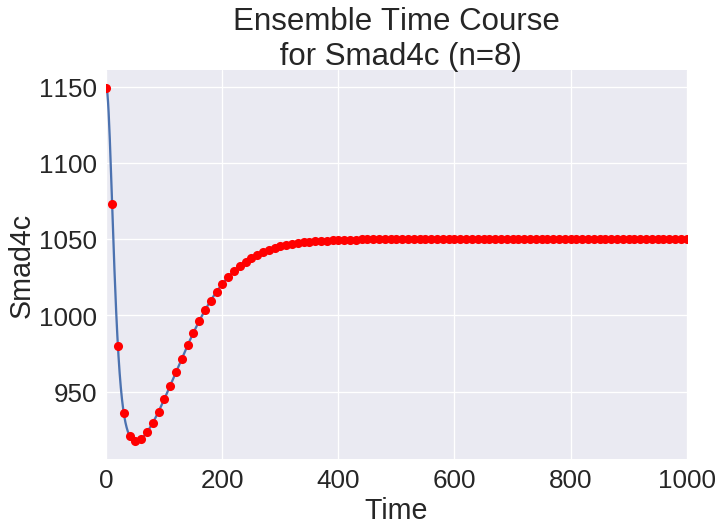

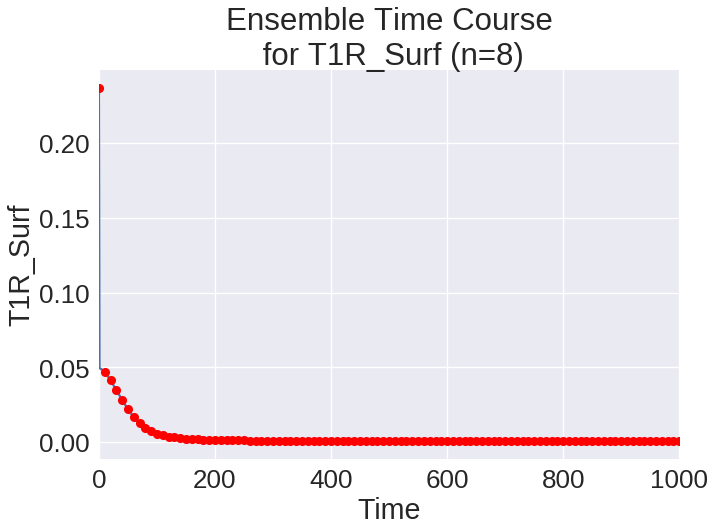

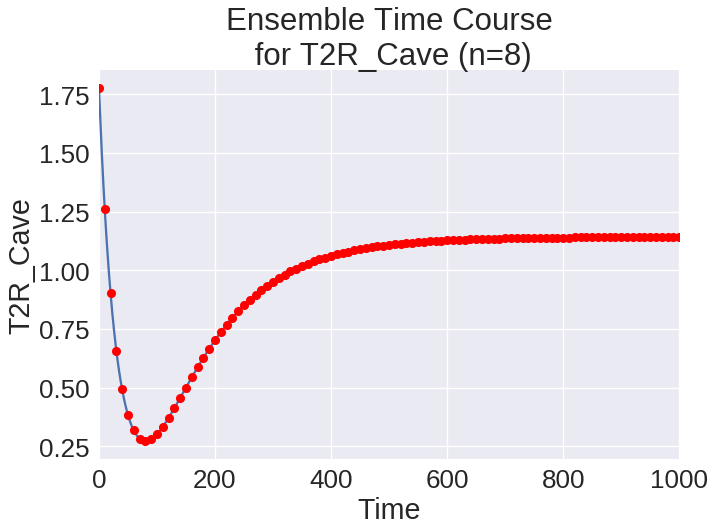

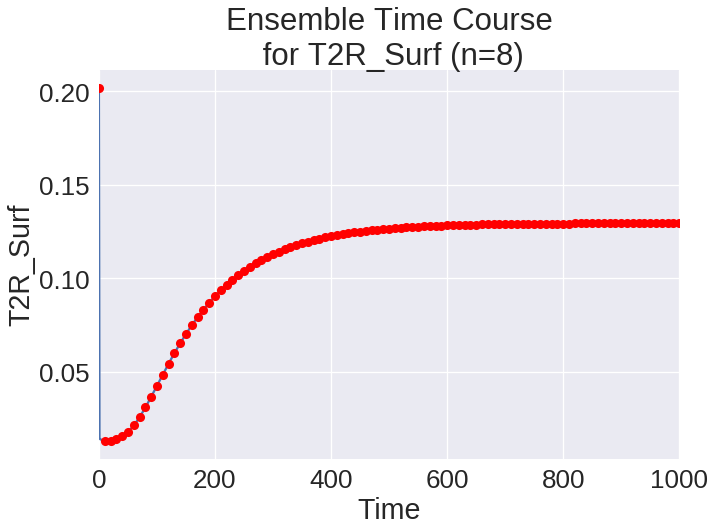

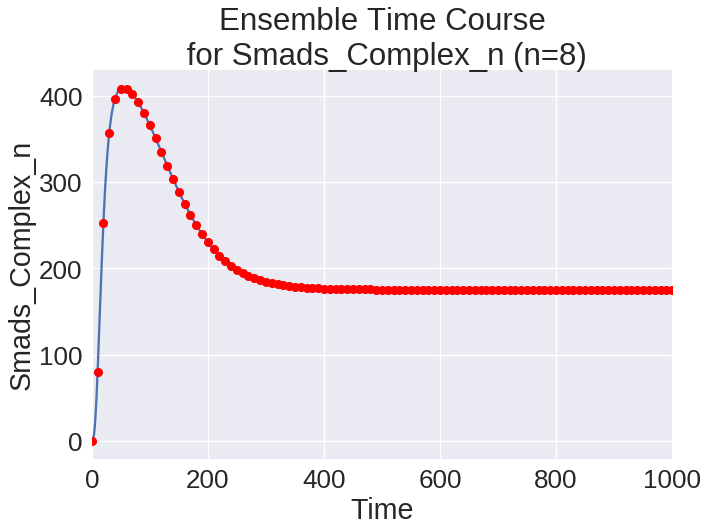

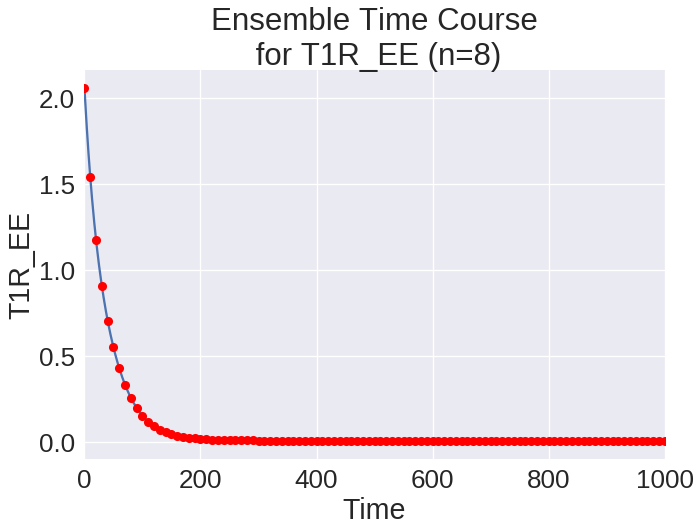

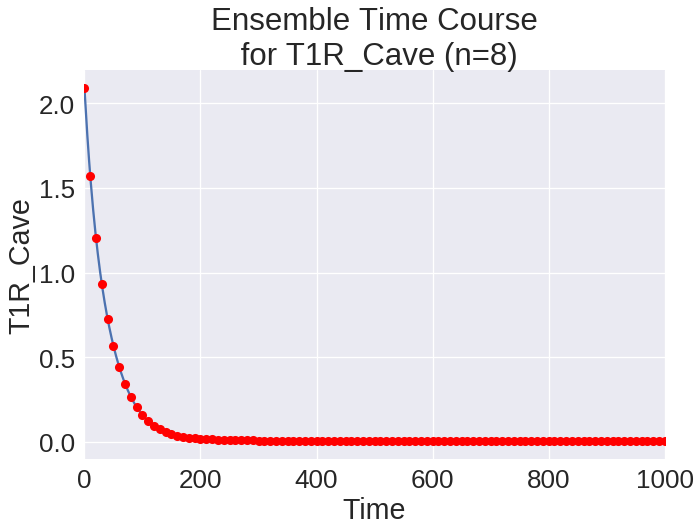

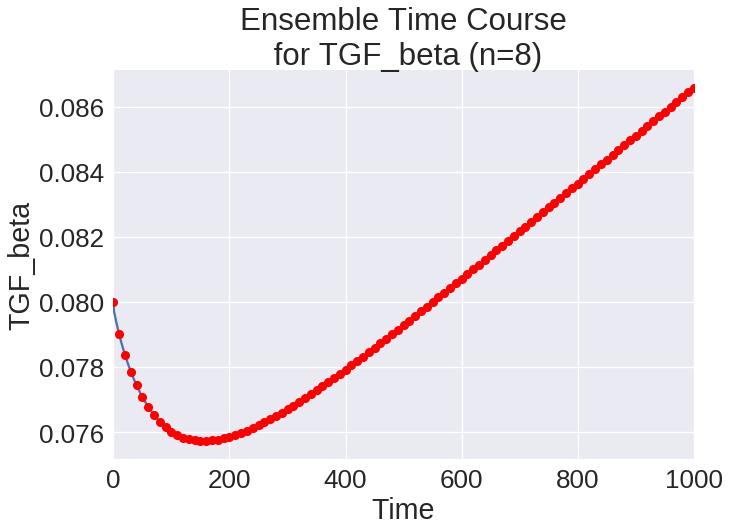

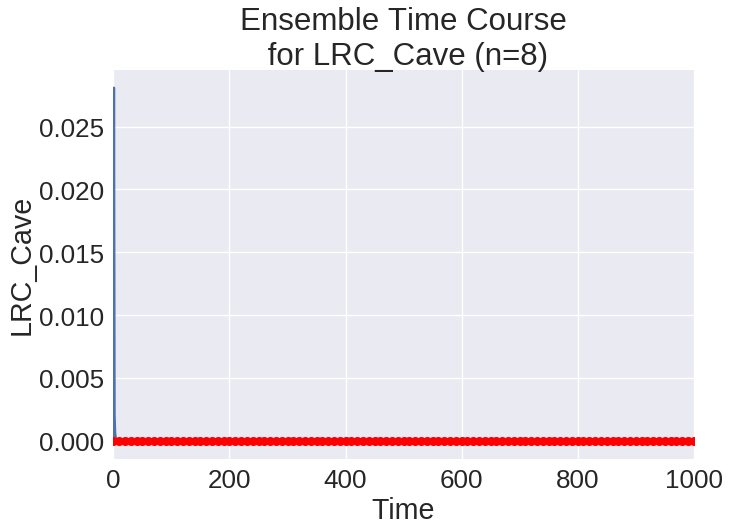

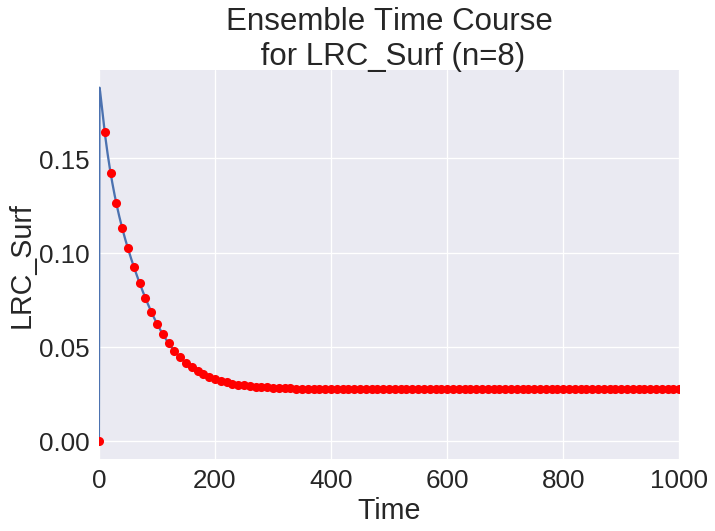

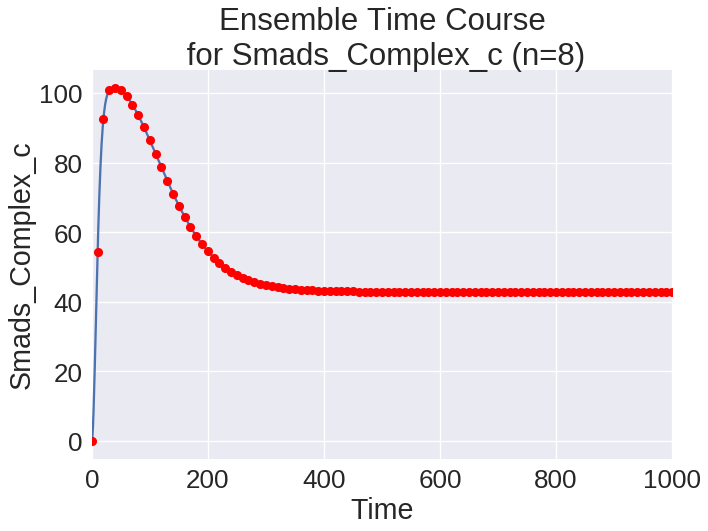

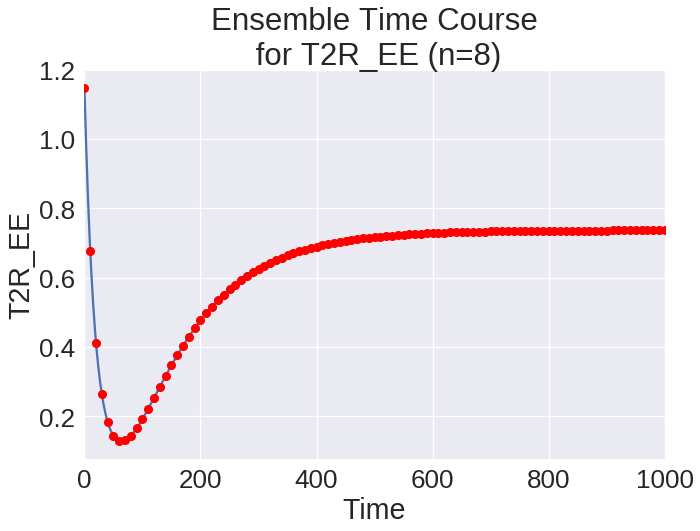

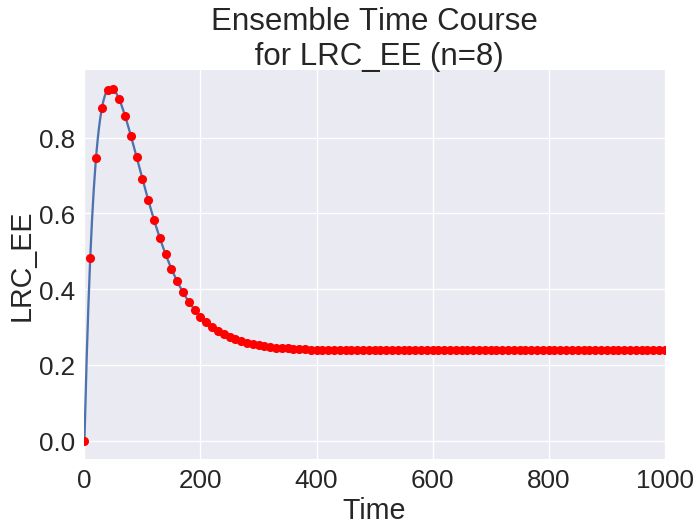

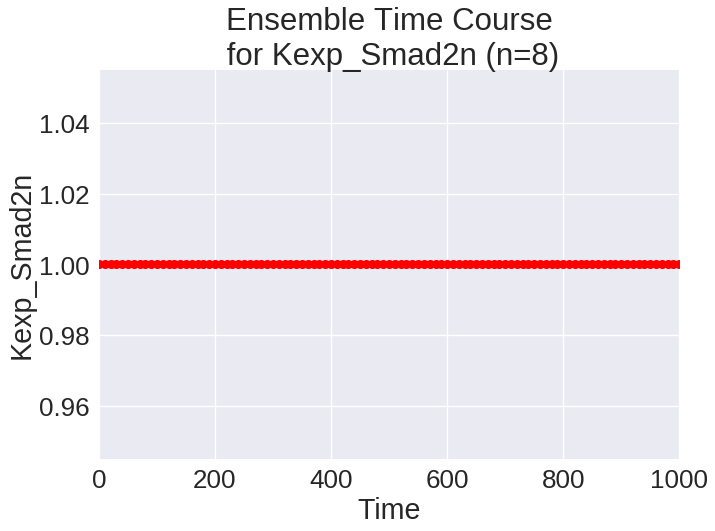

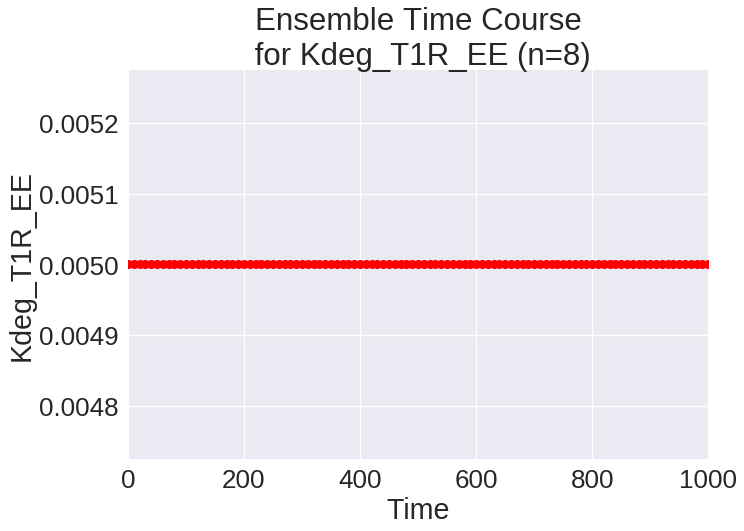

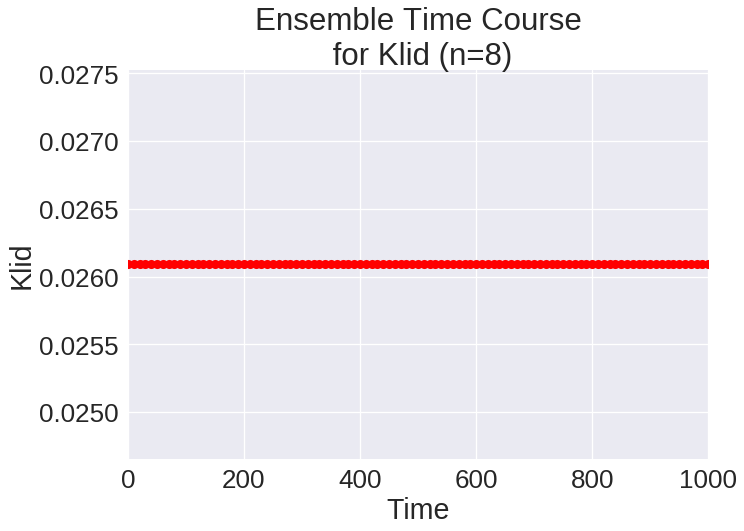

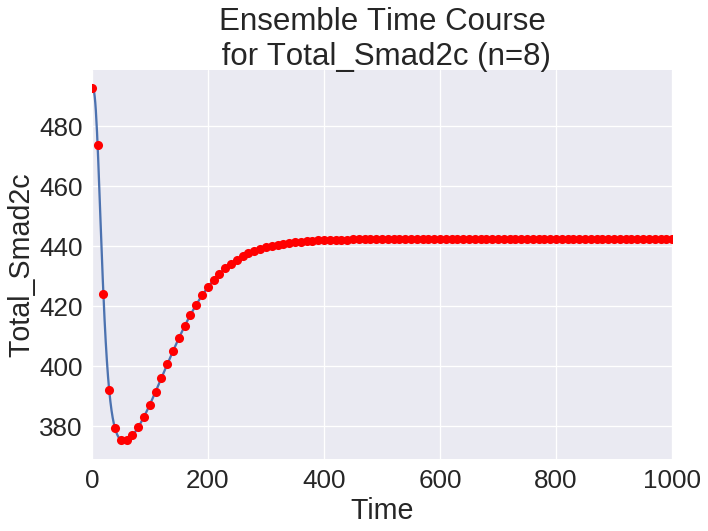

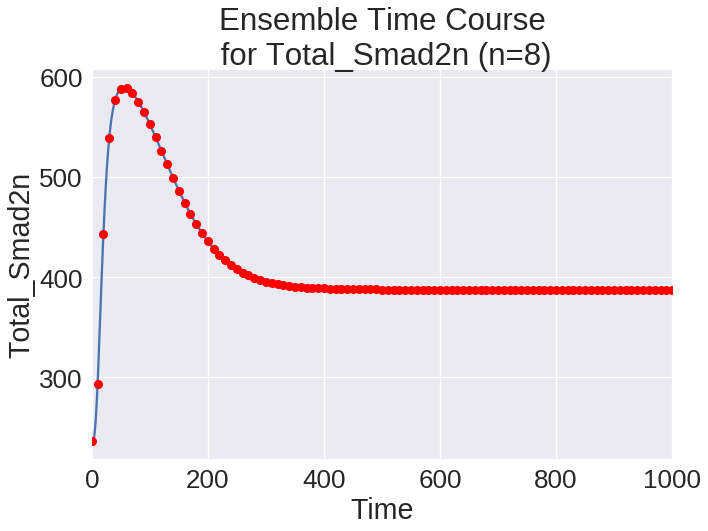

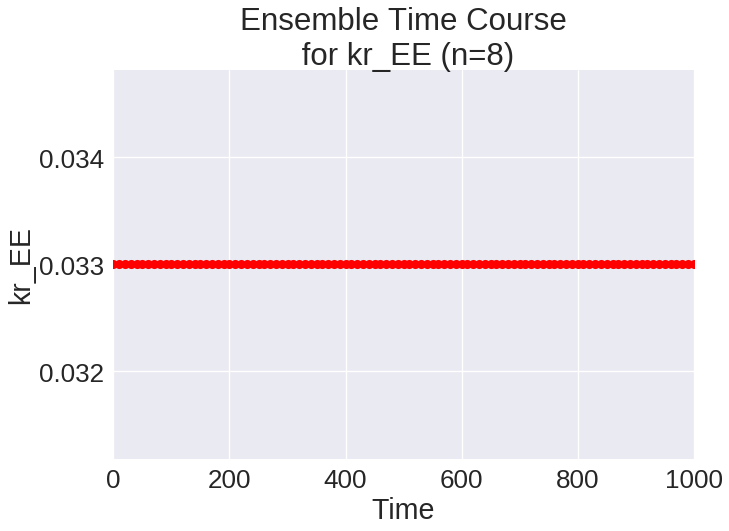

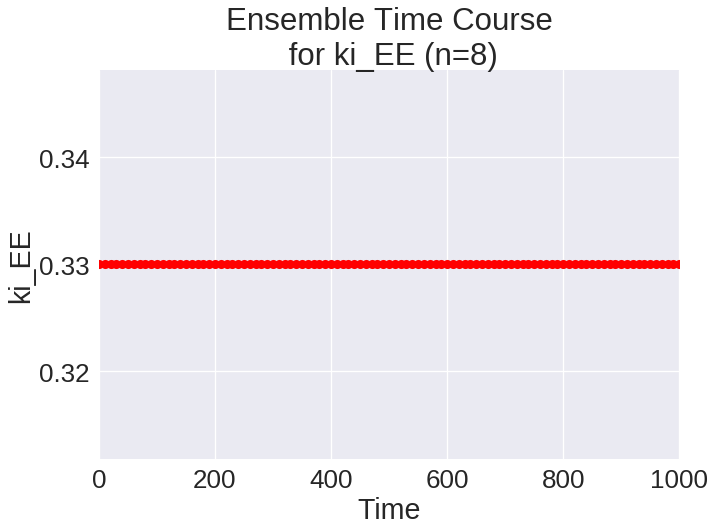

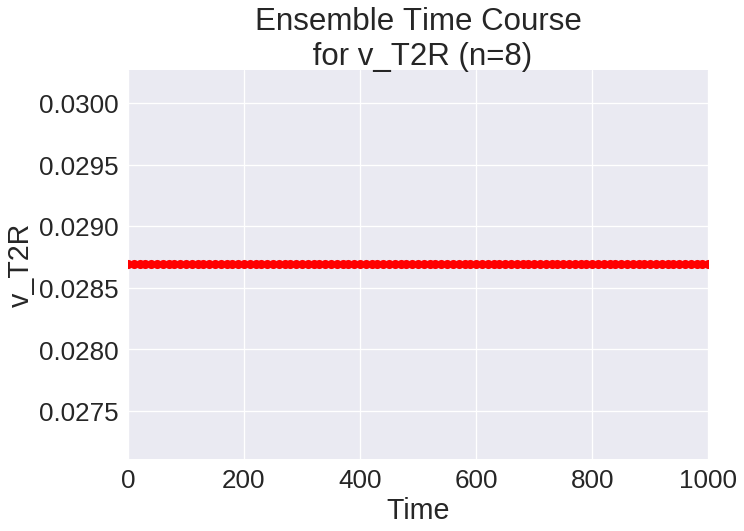

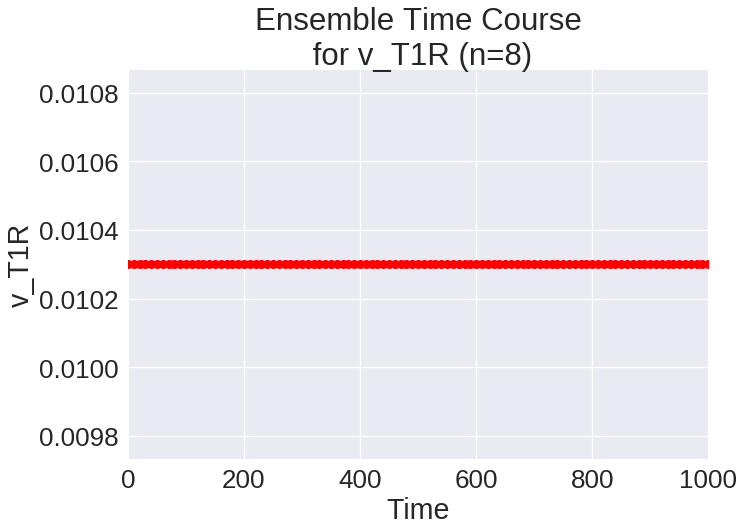

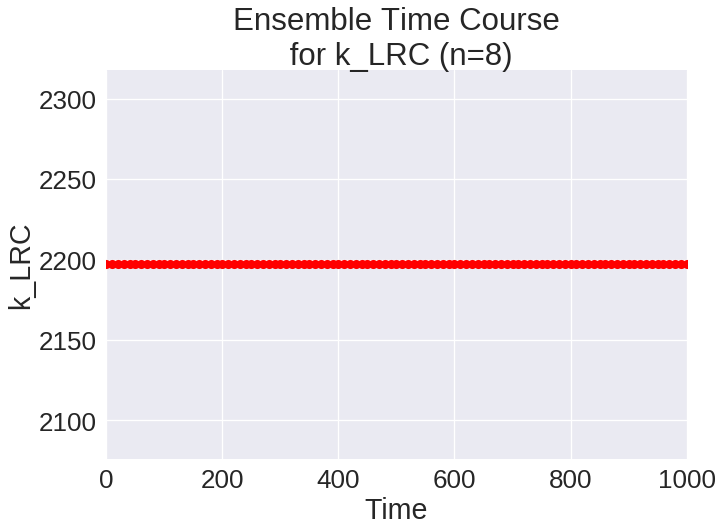

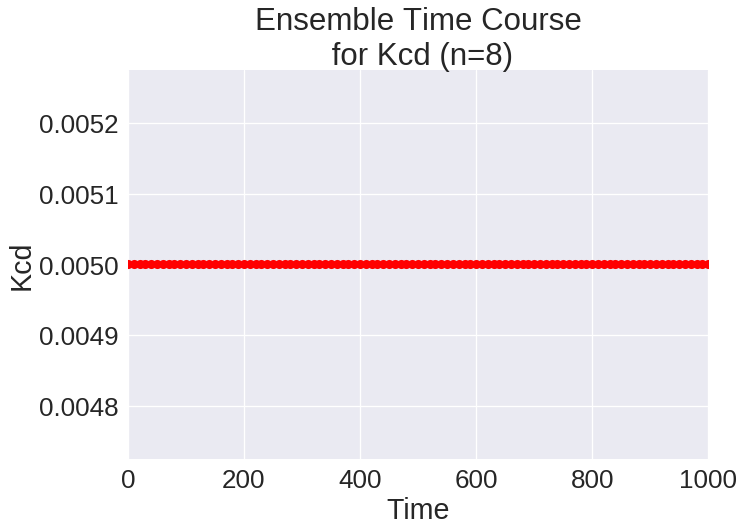

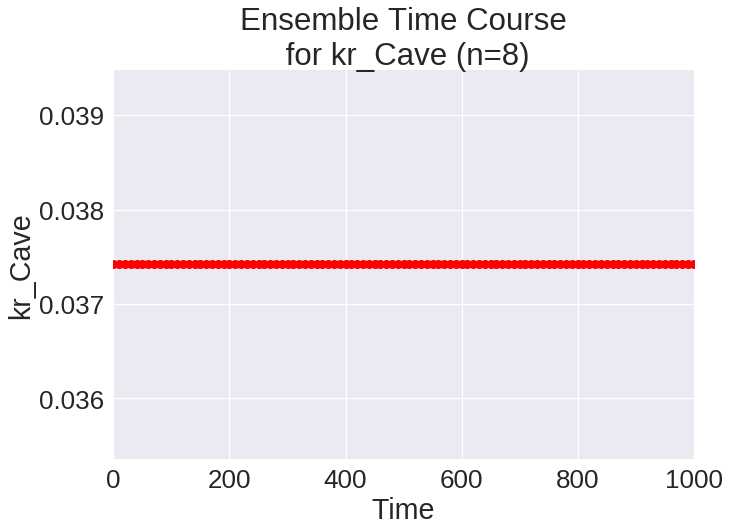

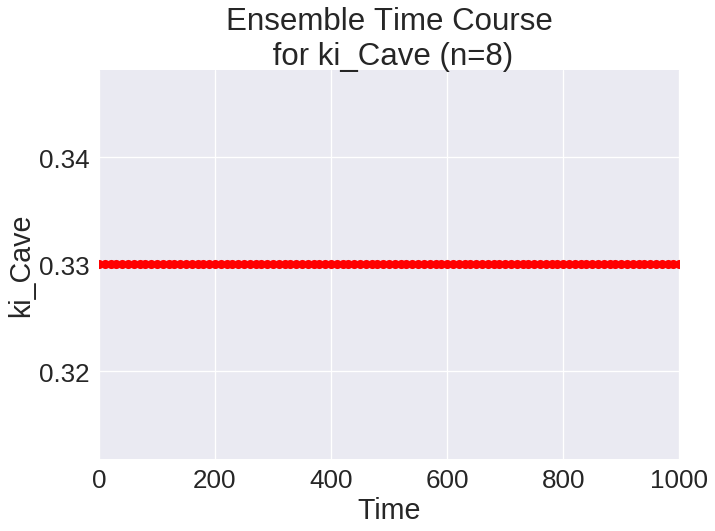

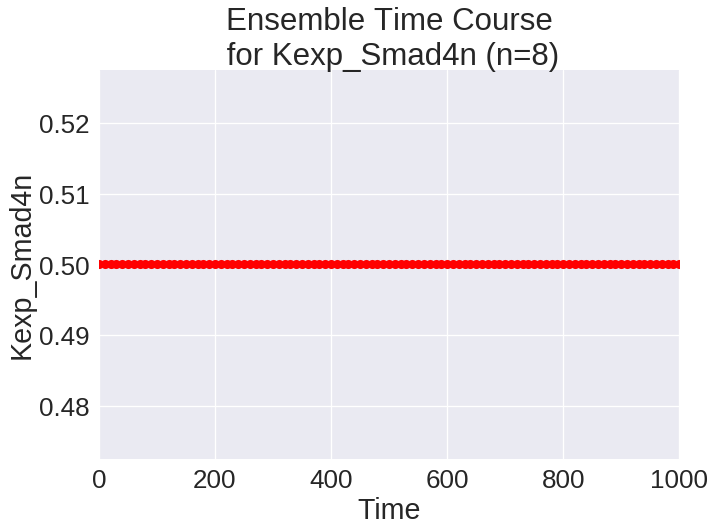

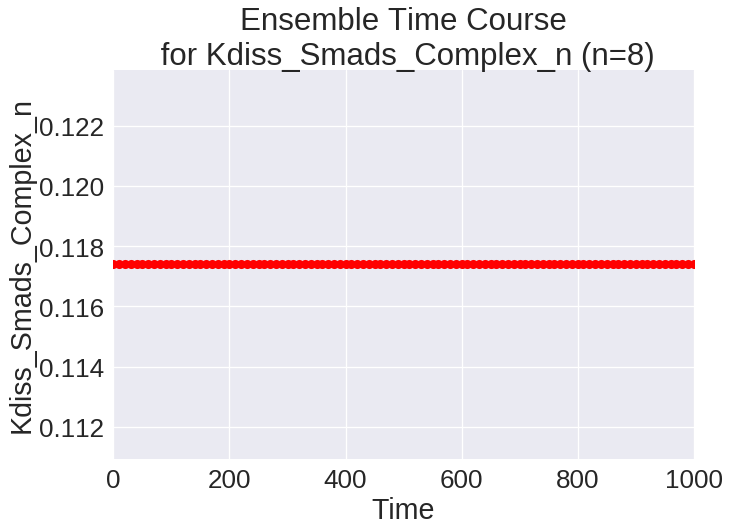

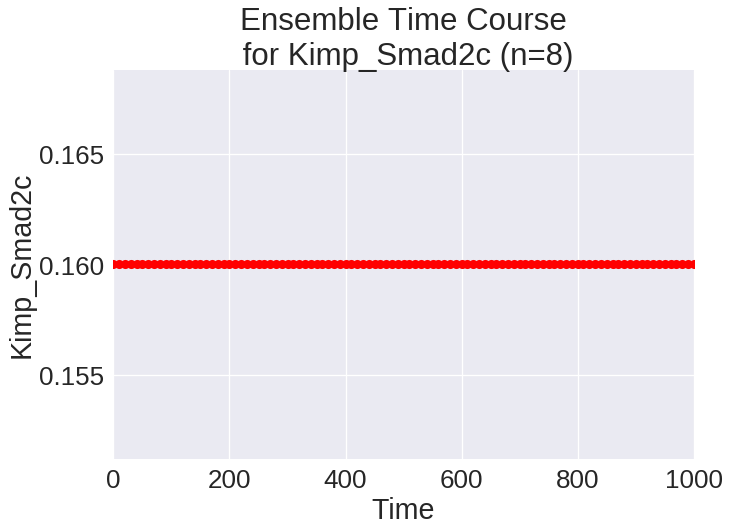

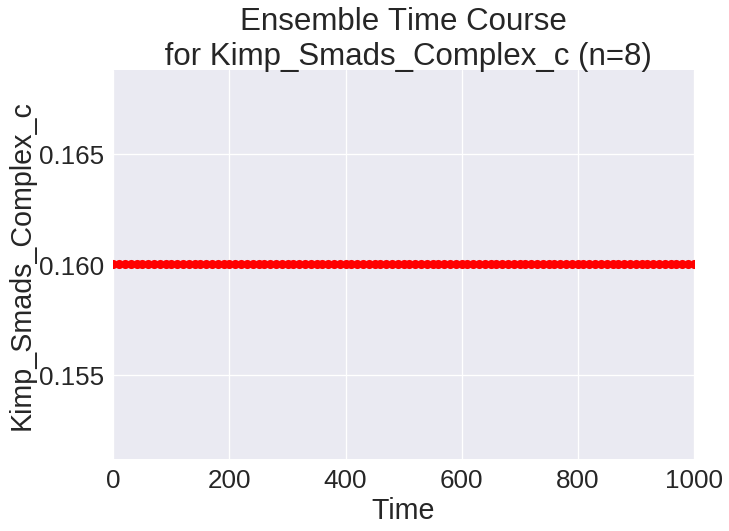

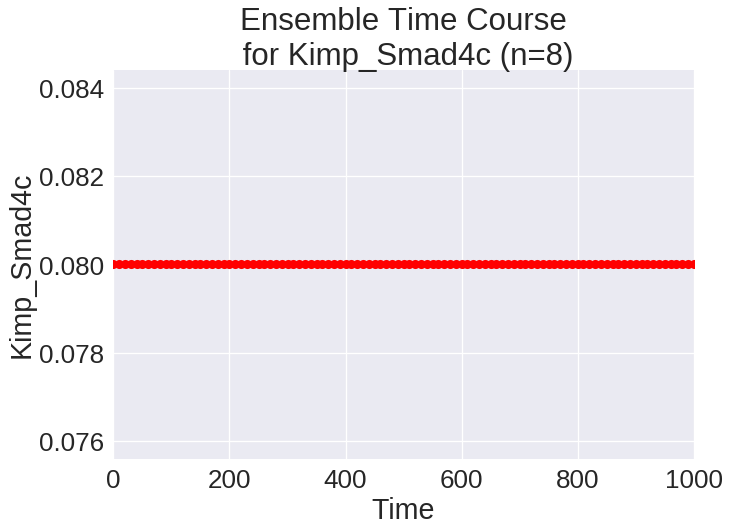

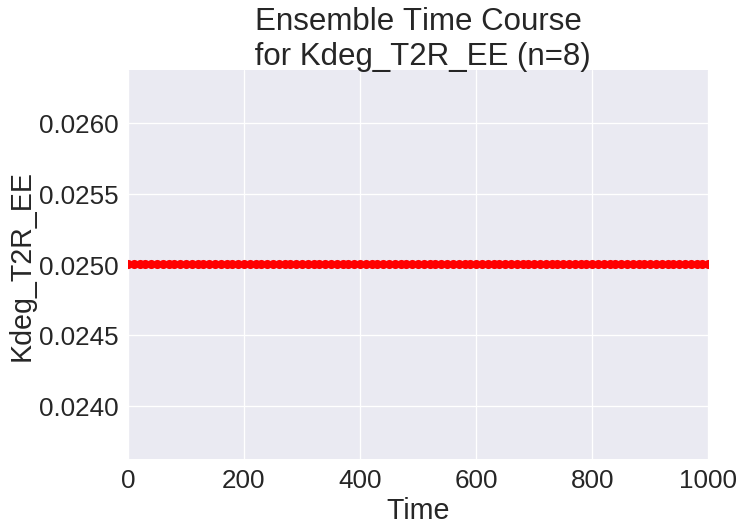

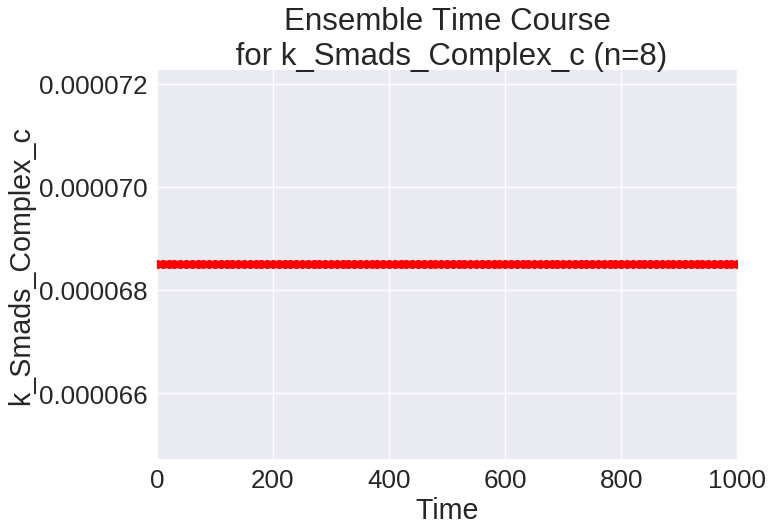

In [6]:
viz.EnsembleTimeCourse(MPE)

## Boxplots

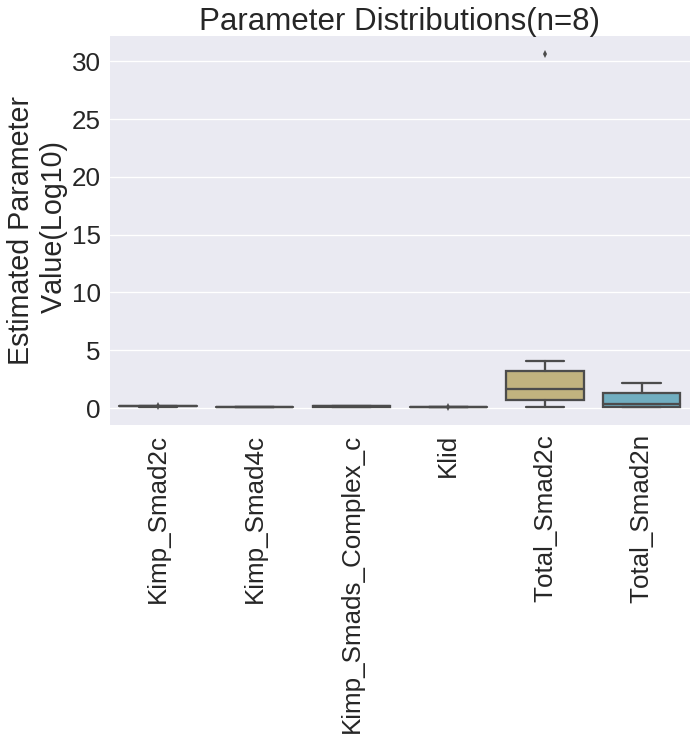

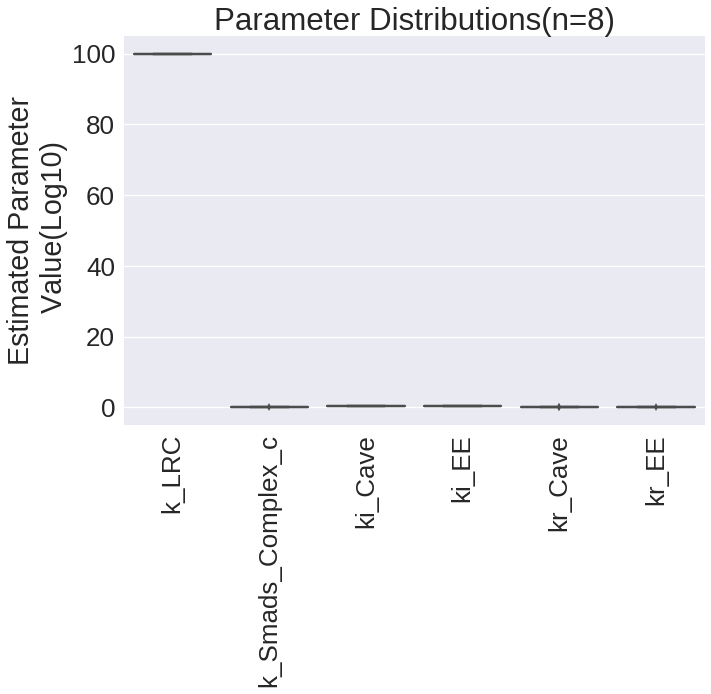

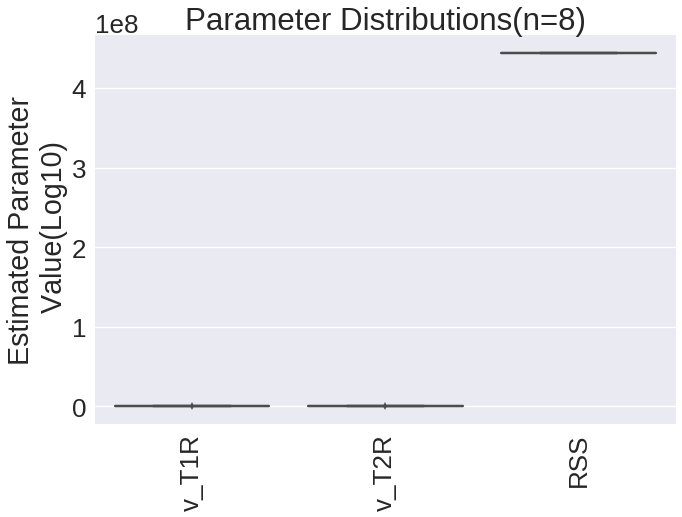

In [7]:
viz.Boxplot(MPE)

## Histograms

pycotools.viz:INFO:1198:    plotting histograms


/home/b3053674/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/b3053674/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


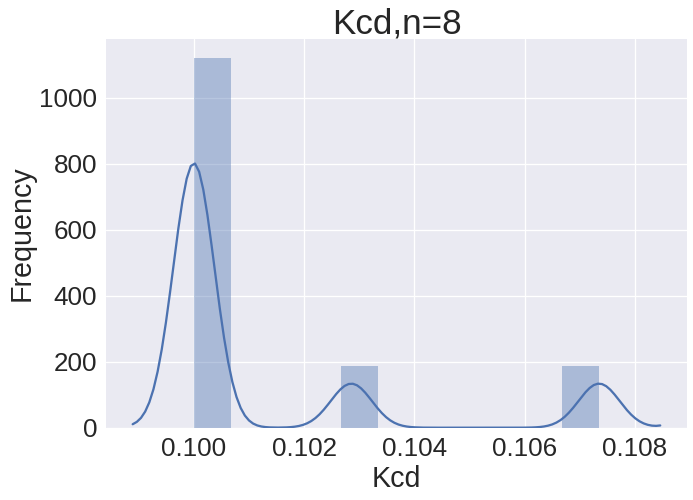

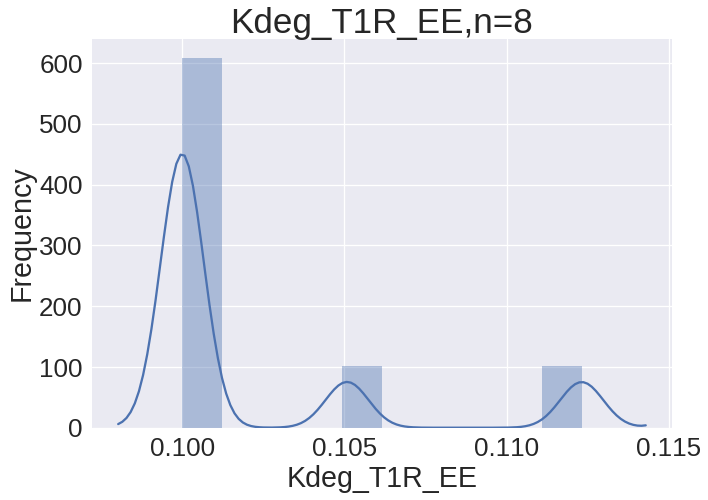

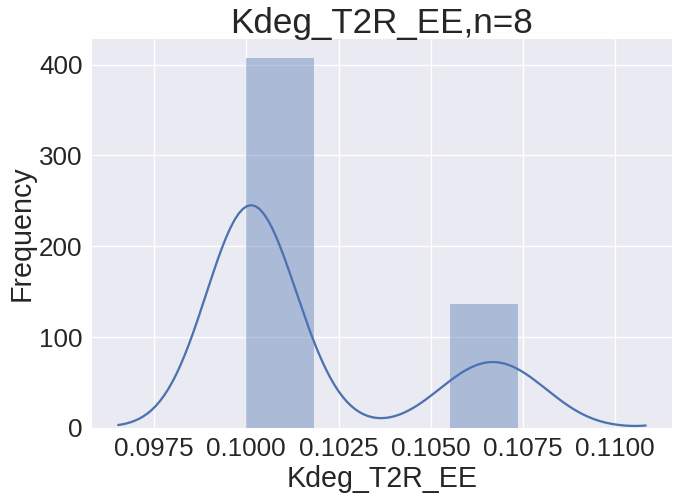

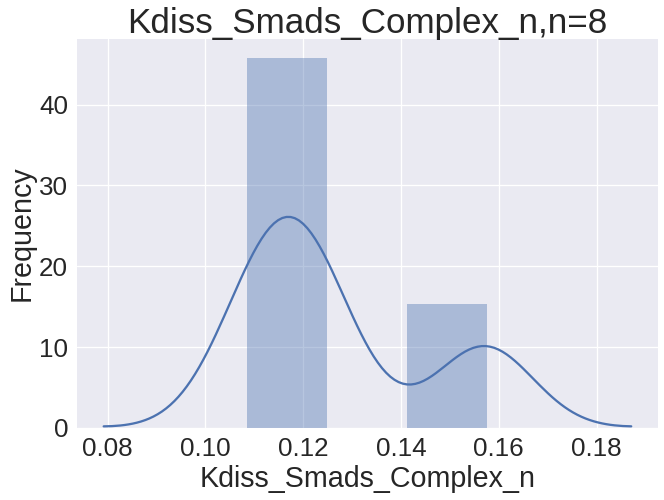

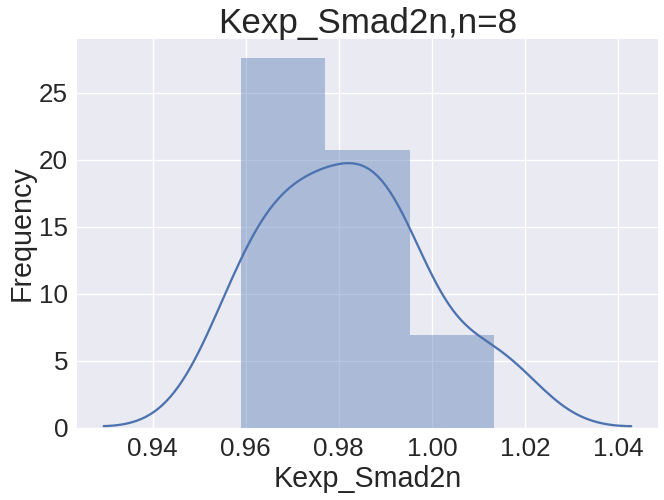

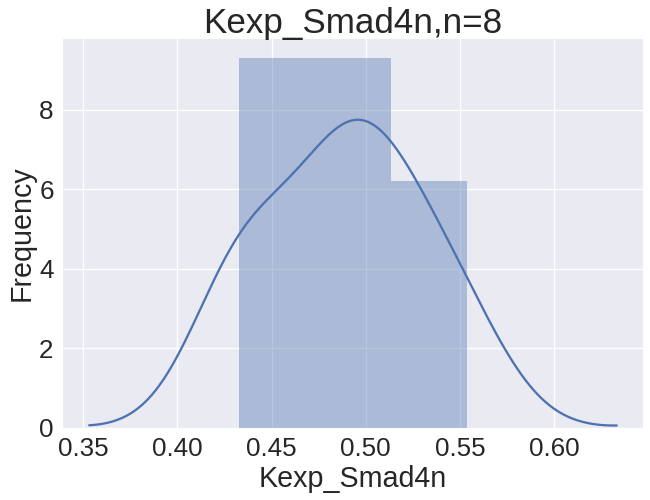

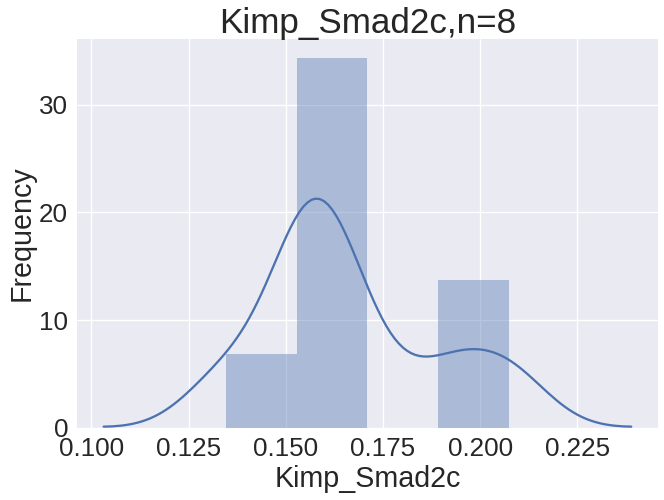

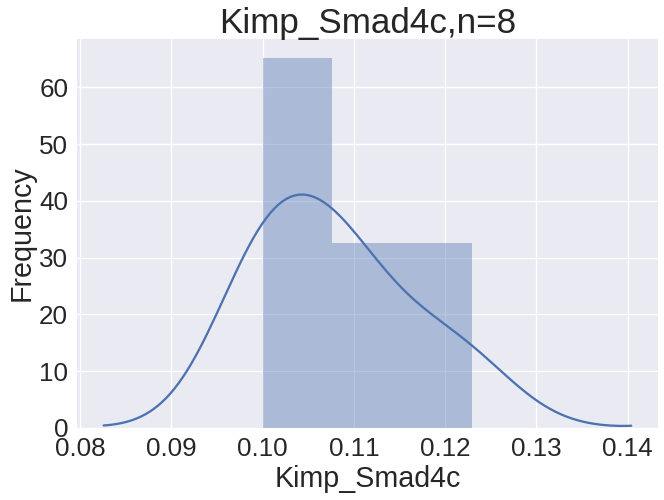

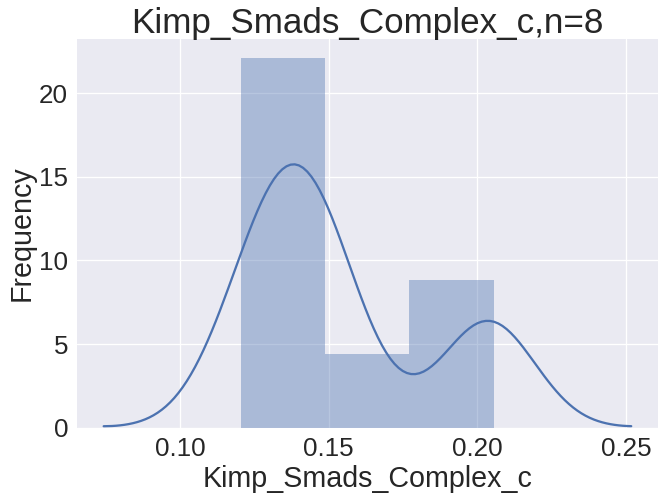

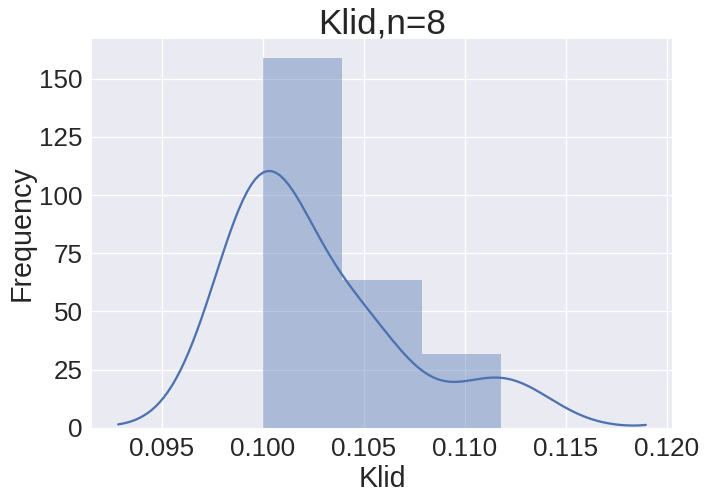

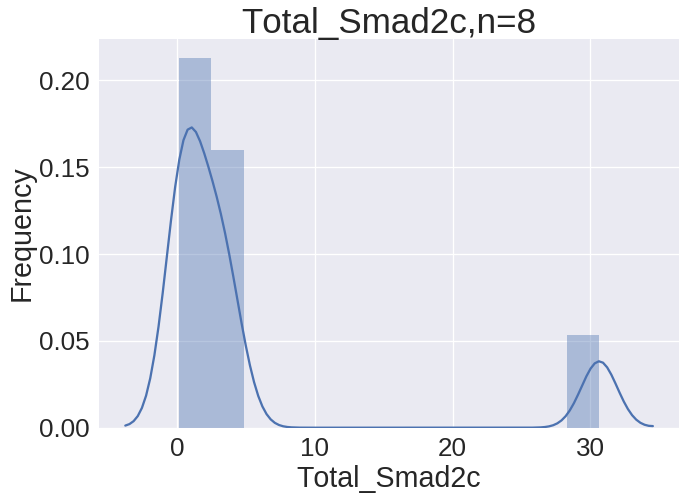

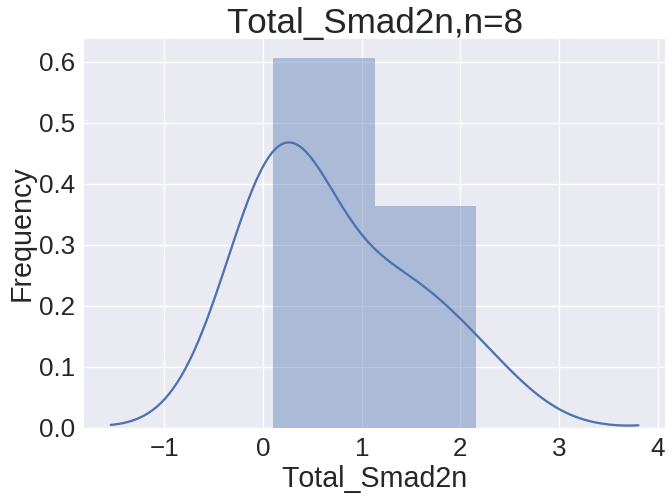

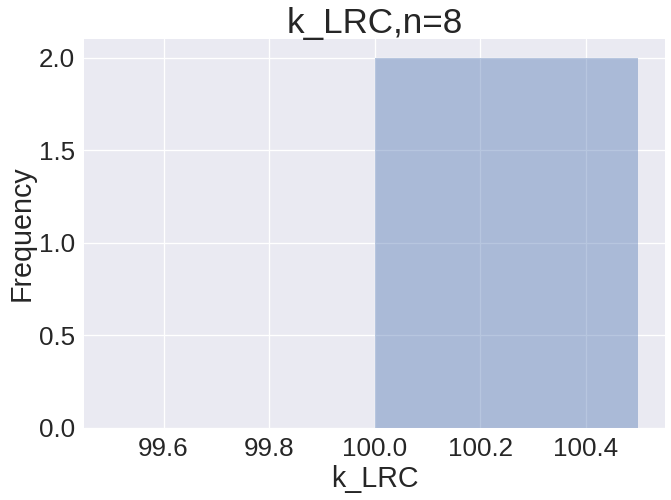

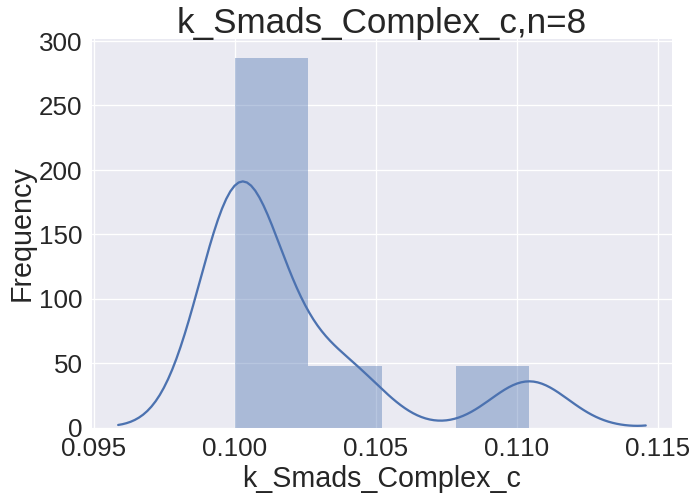

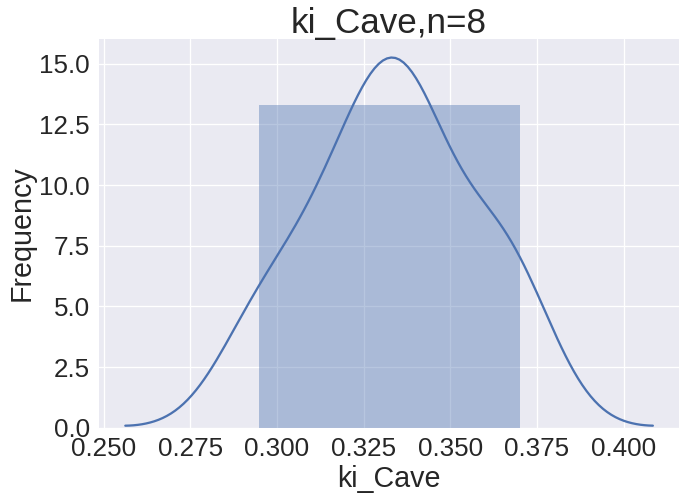

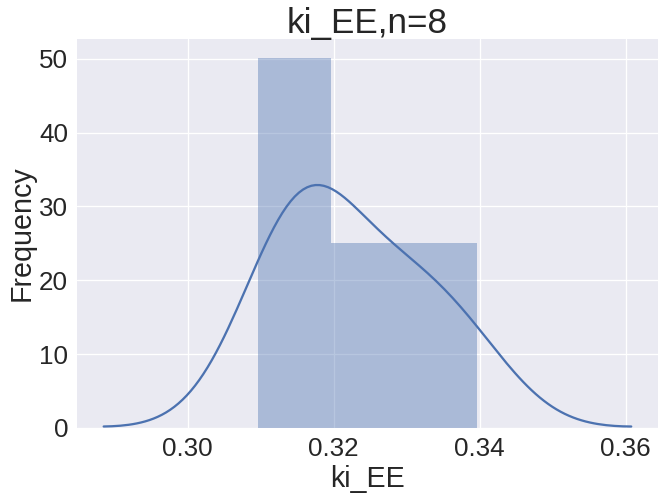

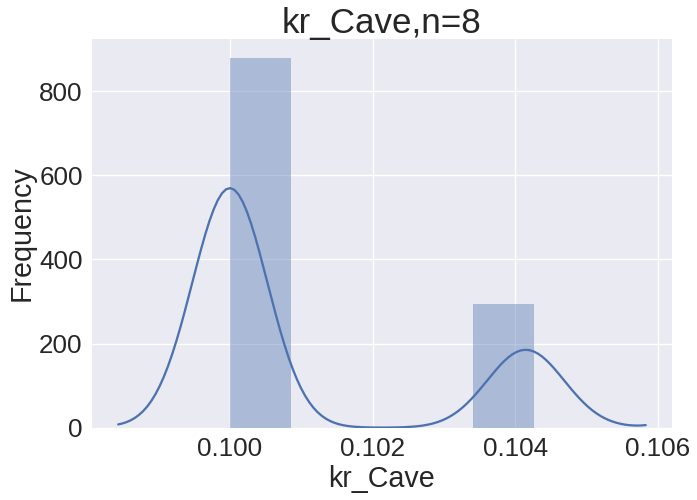

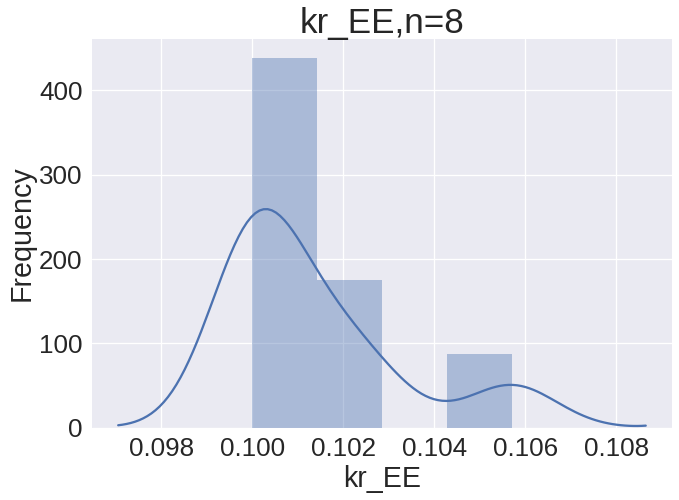

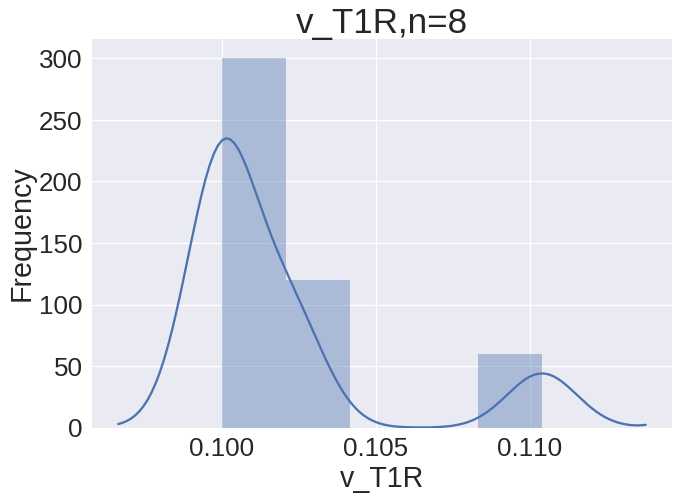

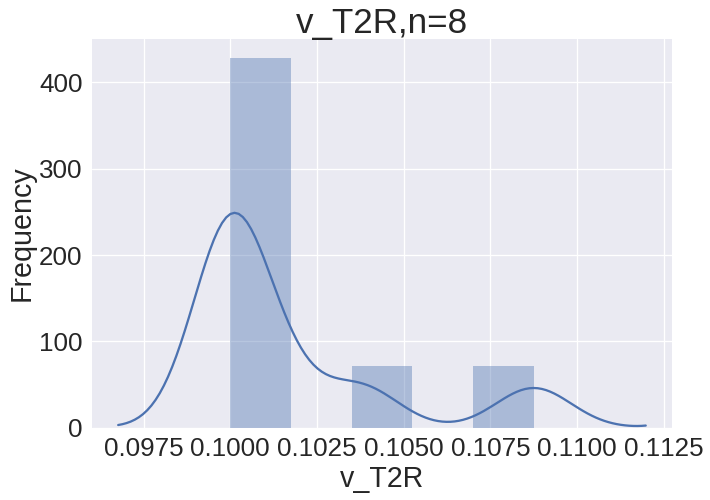

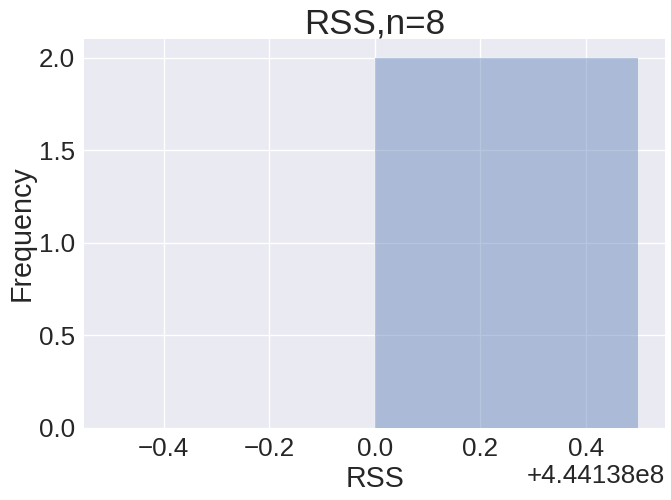

In [8]:
viz.Histograms(MPE)

In [28]:
f = '/home/b3053674/Documents/pycotools/ZiModel/data.csv'
f2 = '/home/b3053674/Documents/pycotools/ZiModel/data2.csv'

df = pandas.read_csv(f)
# df = df.drop(u'Unnamed: 0')
df = df.sort_values(by=['Time', 'ParameterFitIndex'])
# import seaborn
df.to_csv(f2)
# seaborn.tsplot(df, time='Time',value='Smad3c', unit='ParameterFitIndex')

In [23]:
gammas = seaborn.load_dataset("gammas").head()

In [22]:
ax = sns.tsplot(time="timepoint", value="BOLD signal",
                unit="subject", condition="ROI",
                data=gammas)

,timepoint,ROI,subject,BOLD signal
0,0.0,IPS,0,0.513433
1,0.0,IPS,1,-0.414368
2,0.0,IPS,2,0.214695
3,0.0,IPS,3,0.814809
4,0.0,IPS,4,-0.894992
5,0.0,IPS,5,-0.073709
6,0.0,IPS,6,3.542734
7,0.0,IPS,7,0.080169
8,0.0,IPS,8,1.547083
9,0.0,IPS,9,2.827153


To monitor progress, look either at the task manager or system monitor. 